6
5
256
2


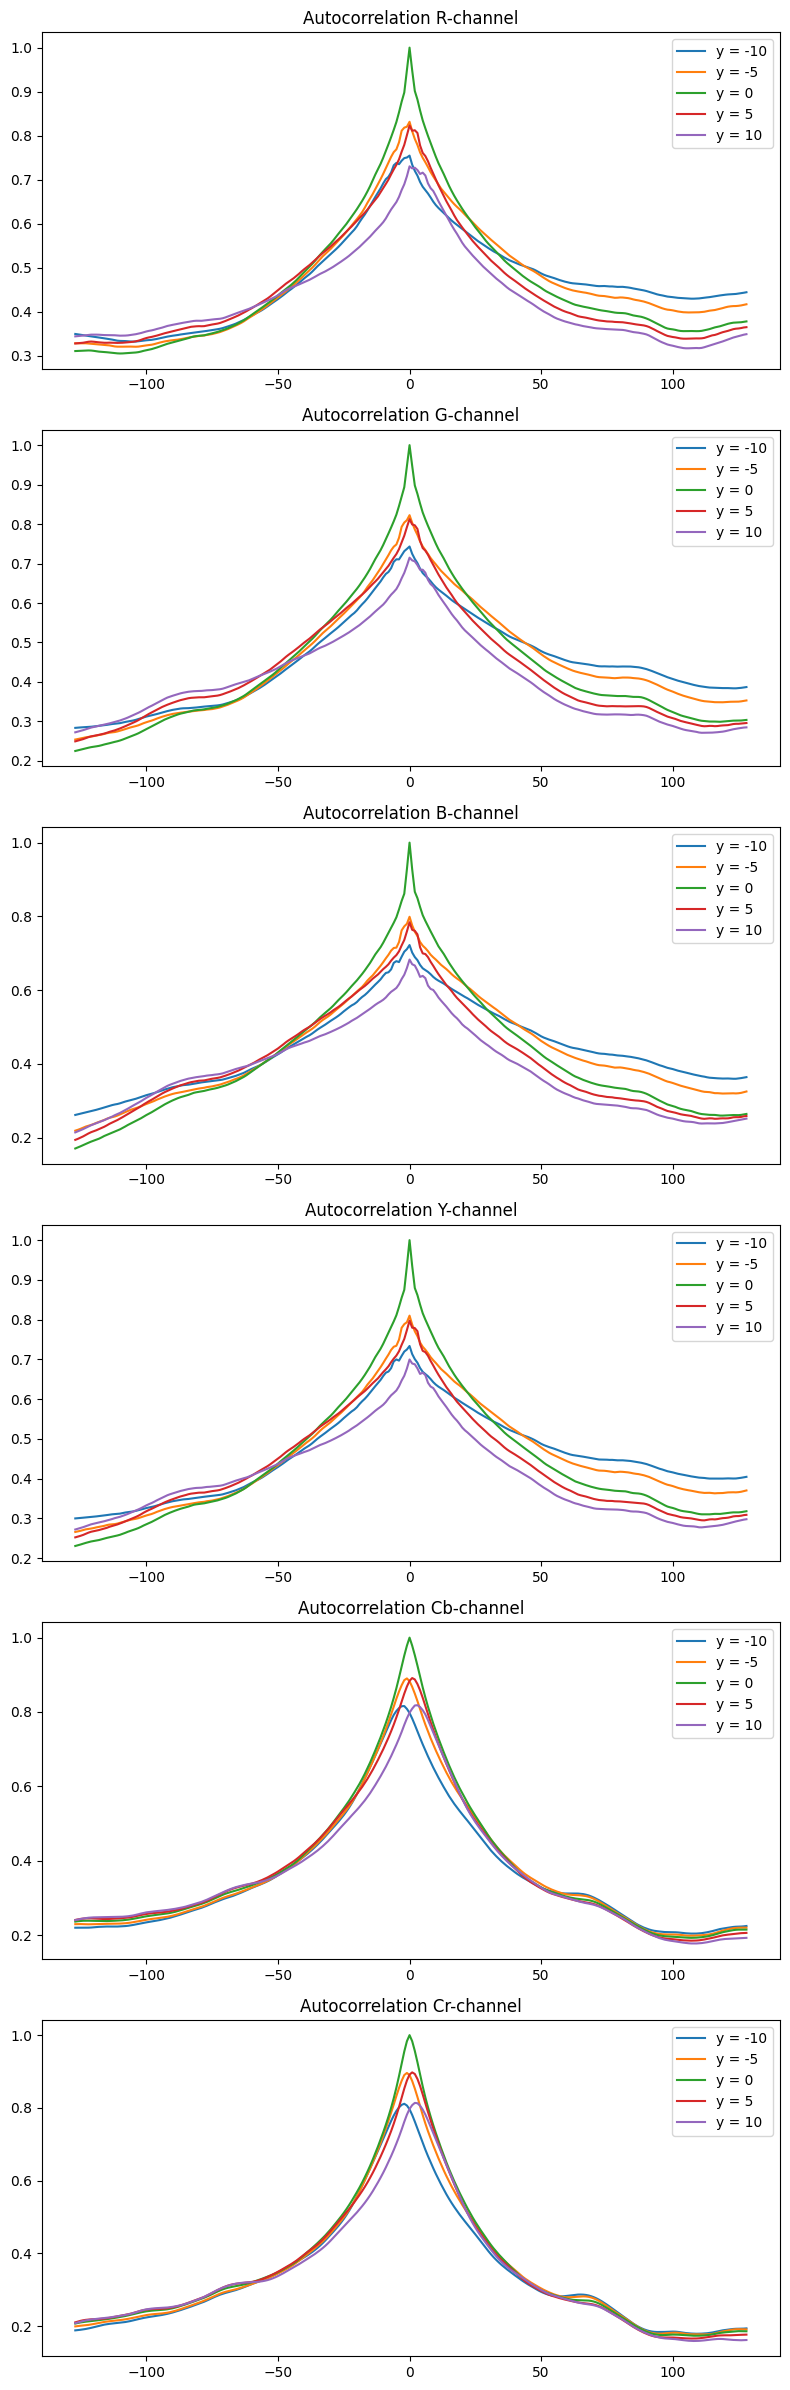

In [4]:
import matplotlib.pyplot as plt
import subprocess

# PARAMS
EXE_PATH = './cmake-build-debug/image_edit.exe'
IMG_PATH = './kodim10.bmp'
option = '-task4b'

def plot_graph(x_vals, y_vals):
    plt.plot(x_vals, y_vals)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Graph')
    plt.grid(True)
    plt.show()


def parse_output(output):
    channels = []
    current_channel = []
    curent_y = []
    current_y_value = None
    for line in output:
        if line.strip() == 'NEXT_CHANNEL':
            if current_channel:
                channels.append(current_channel)
                current_channel = []
        elif line.strip() == 'NEXT_Y':
            if curent_y:
                current_channel.append(curent_y)
                curent_y = []
        else:
            values = line.strip().split()
            if (len(values) != 0):
                y_value = int(values[0])
            if (len(values) != 0):
                curent_y.append((int(values[1]), float(values[2])))
    if current_channel:
        channels.append(current_channel)
    return channels


executable_path = f'{EXE_PATH} {option} {IMG_PATH}'
process = subprocess.Popen(executable_path, stdout=subprocess.PIPE)
output = process.communicate()[0].decode('utf-8').split('\r\n')

channels = parse_output(output)

print(len(channels)) # 2
print(len(channels[0])) # 5
print(len(channels[0][0])) # 256
print(len(channels[0][0][0])) # 2

titles = [
    'Autocorrelation R-channel', 
    'Autocorrelation G-channel', 
    'Autocorrelation B-channel', 
    'Autocorrelation Y-channel', 
    'Autocorrelation Cb-channel', 
    'Autocorrelation Cr-channel'
]
labels = [-10, -5, 0, 5, 10]


# Создание динамического количества окон графиков
num_windows = len(channels)
fig, axes = plt.subplots(num_windows, figsize=(8, 4*num_windows))

for i in range(num_windows):  # Перебираем количество окон
    axes[i].set_title(titles[i])  # Устанавливаем название графика
    num_plots = len(channels[i])
    for j in range(num_plots):  # В каждом окне динамическое количество графиков
        x_vals = []
        y_vals = []
        for k in range(len(channels[0][0])):
            x_vals.append(channels[i][j][k][0])  # Значения по оси X
            y_vals.append(channels[i][j][k][1])  # Значения по оси Y
        axes[i].plot(x_vals, y_vals, label=f'y = {labels[j]}')  # Строим график на соответствующей оси в окне
    axes[i].legend()  # Добавляем легенду


plt.tight_layout()  # Располагаем графики компактно
plt.show()


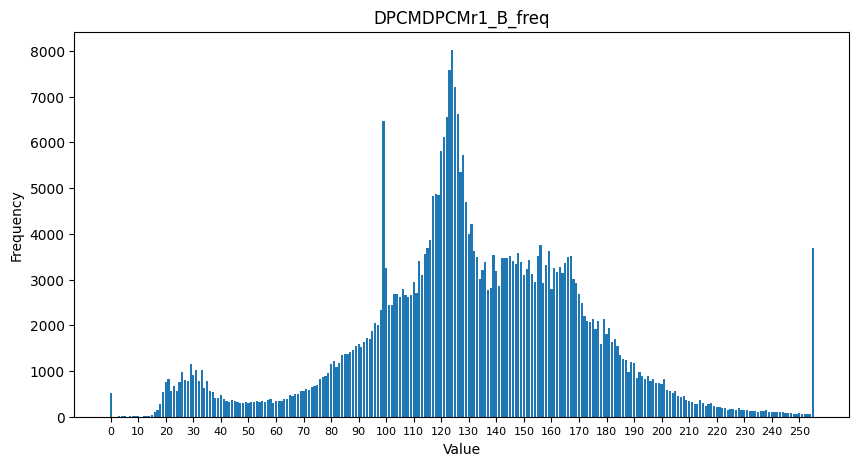

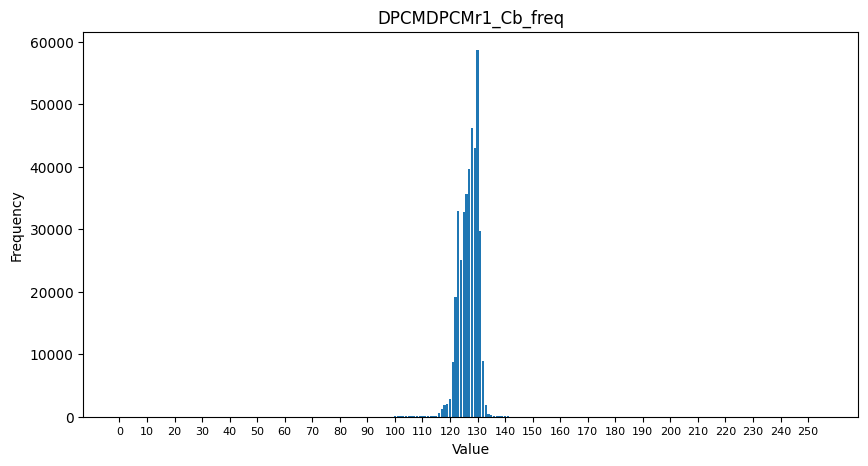

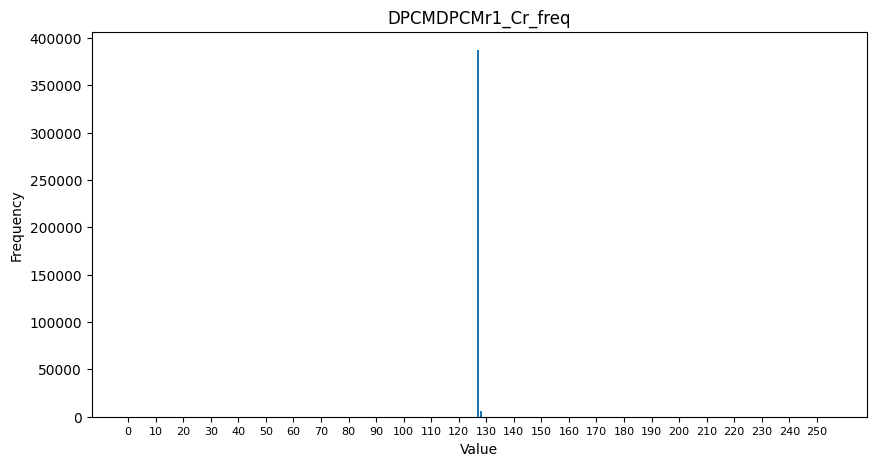

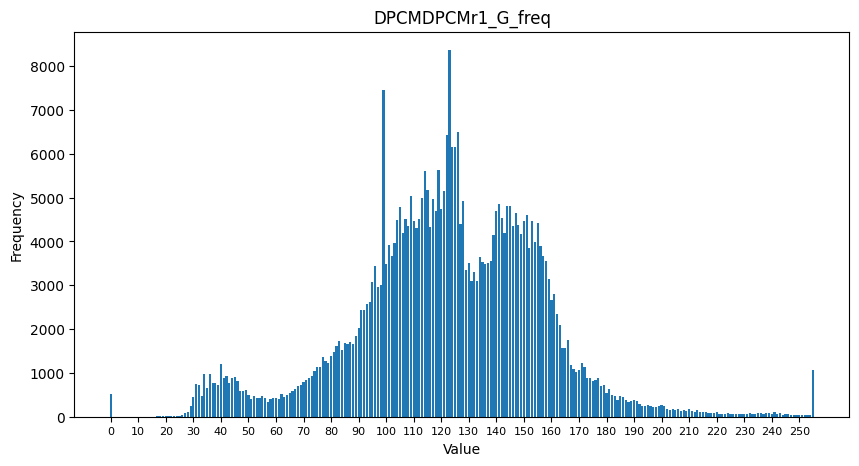

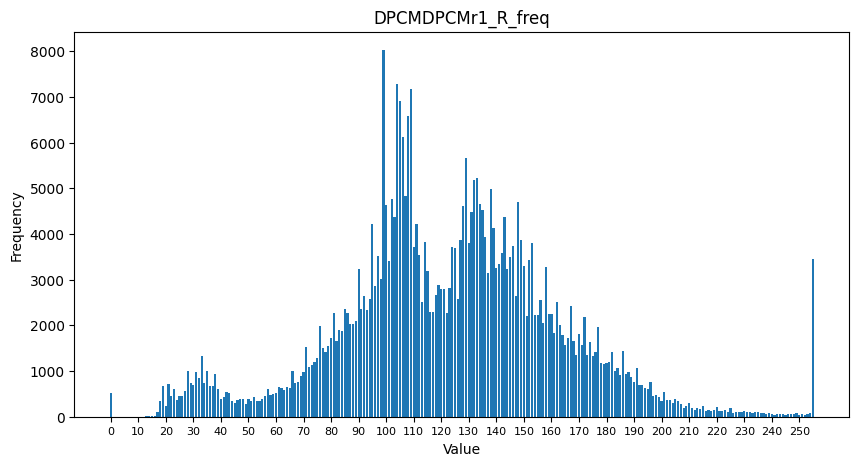

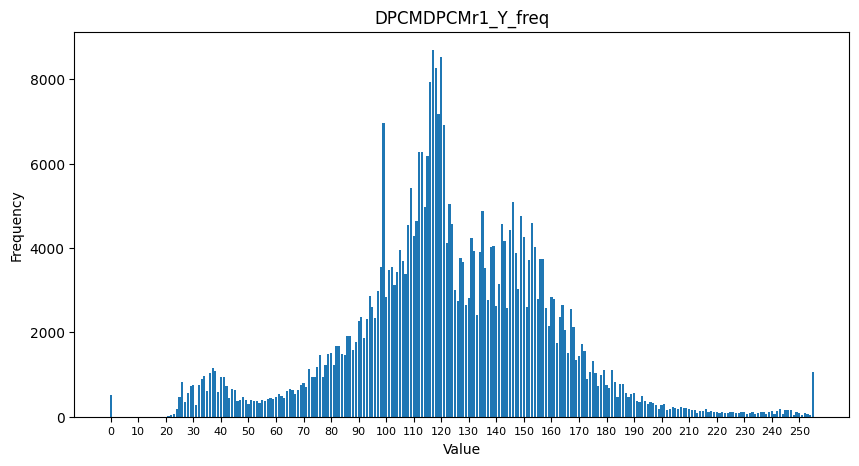

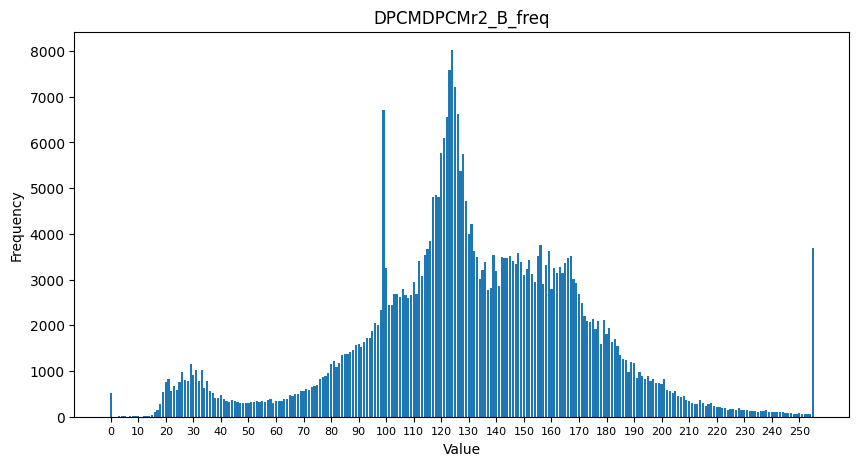

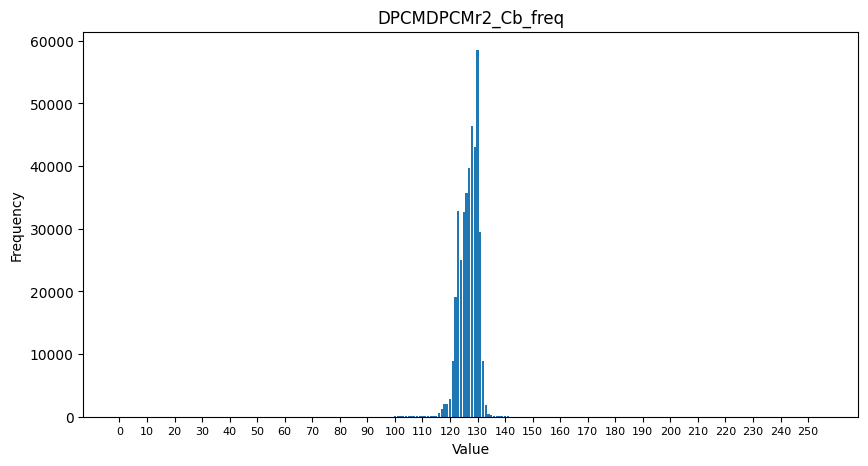

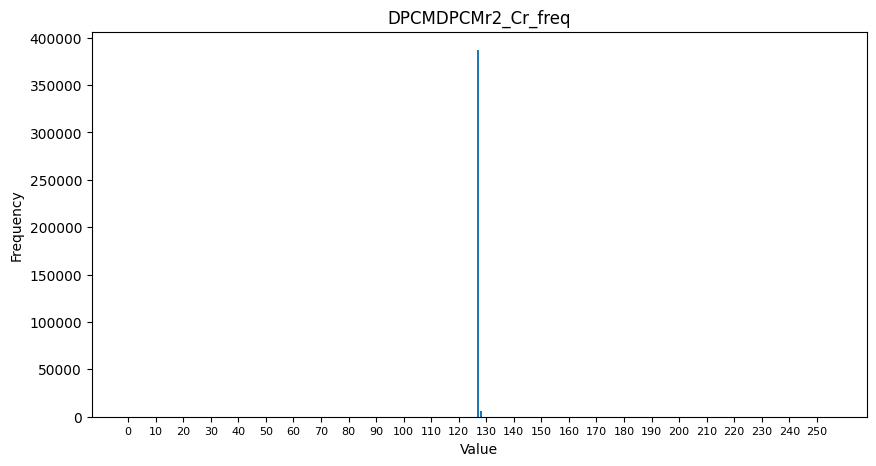

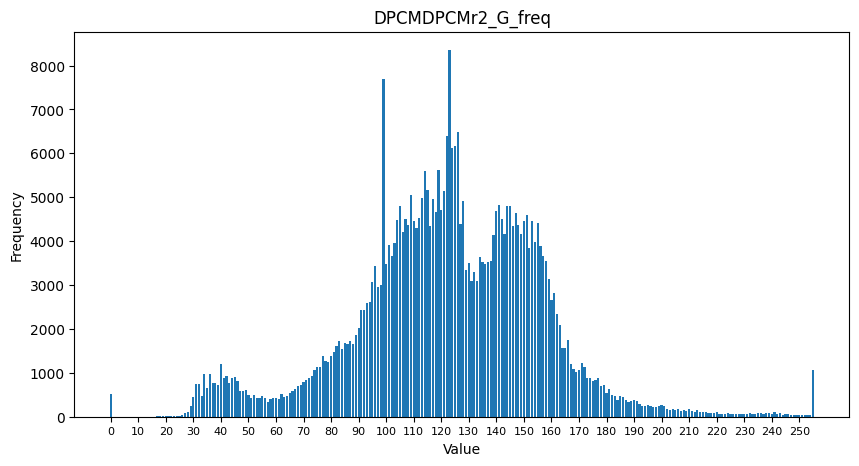

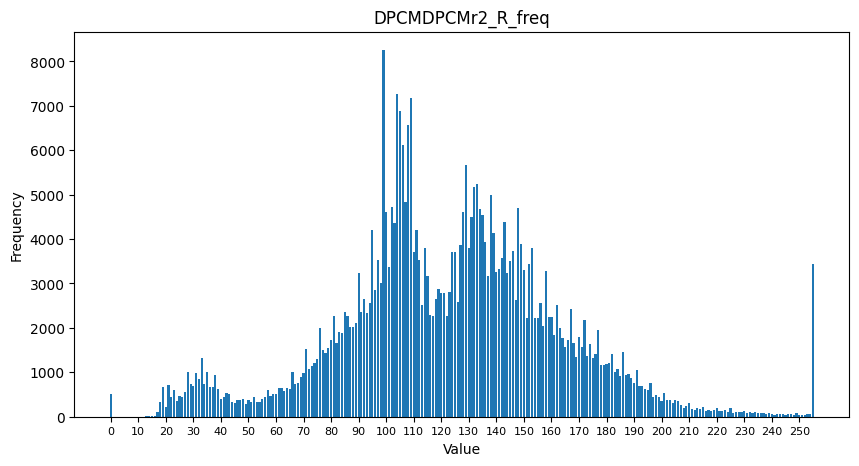

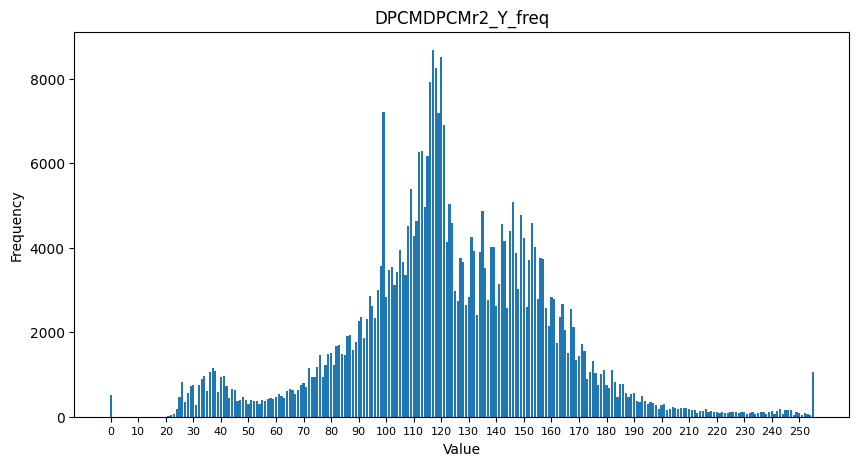

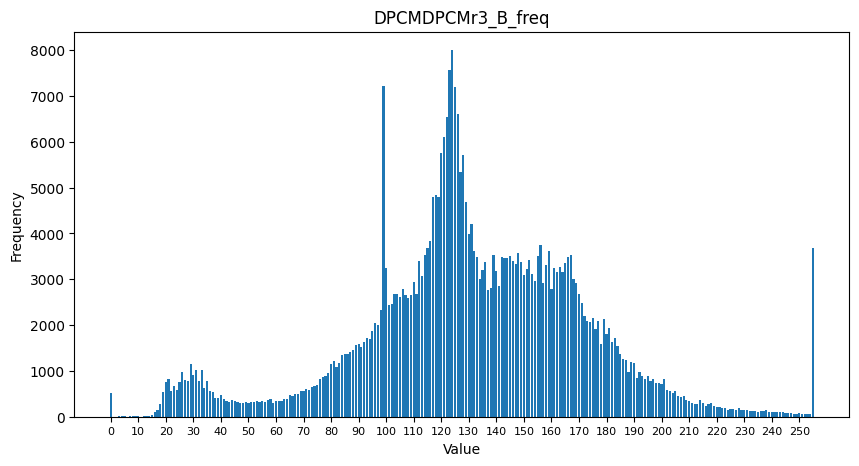

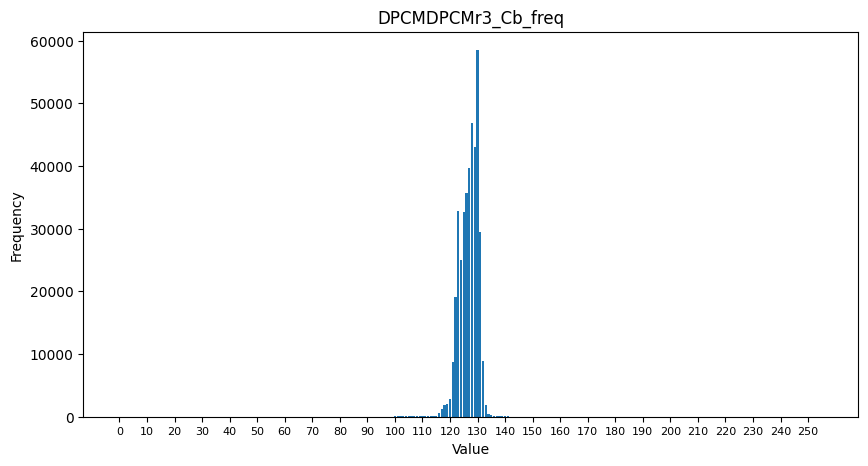

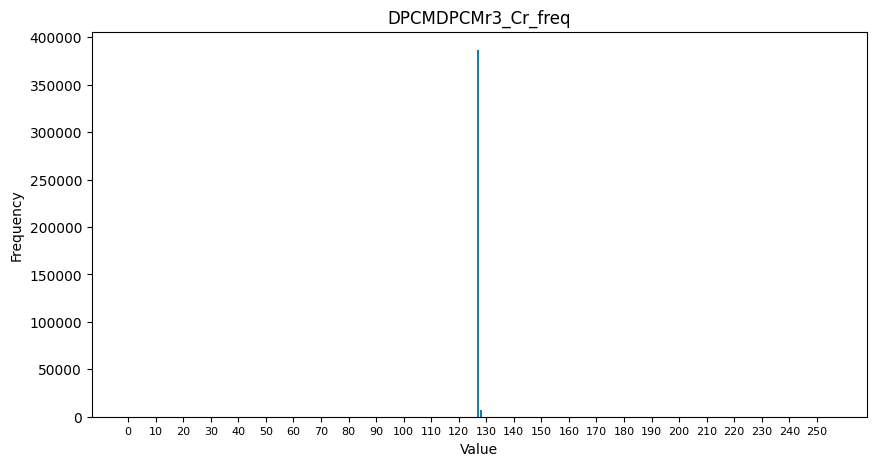

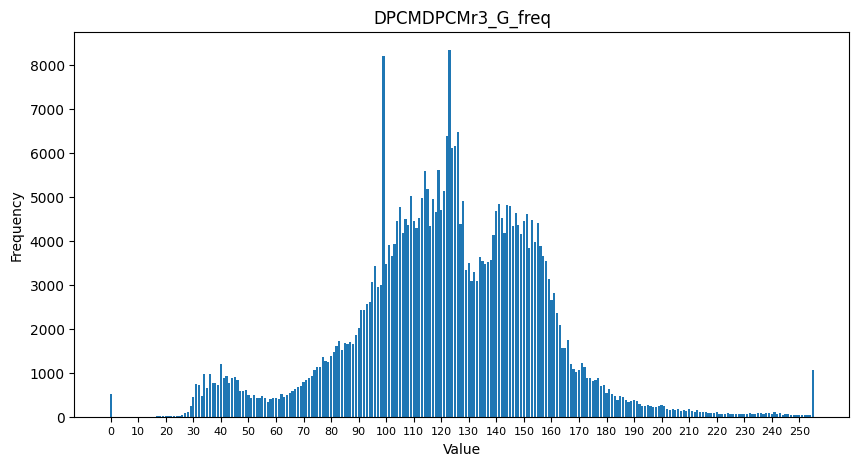

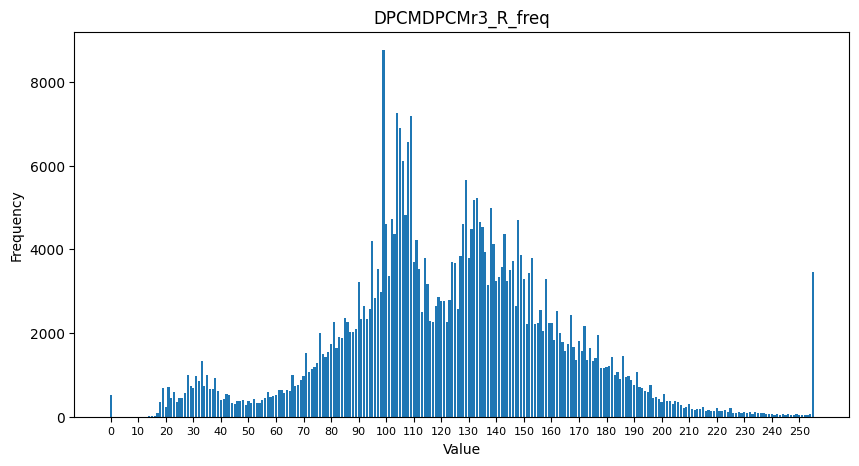

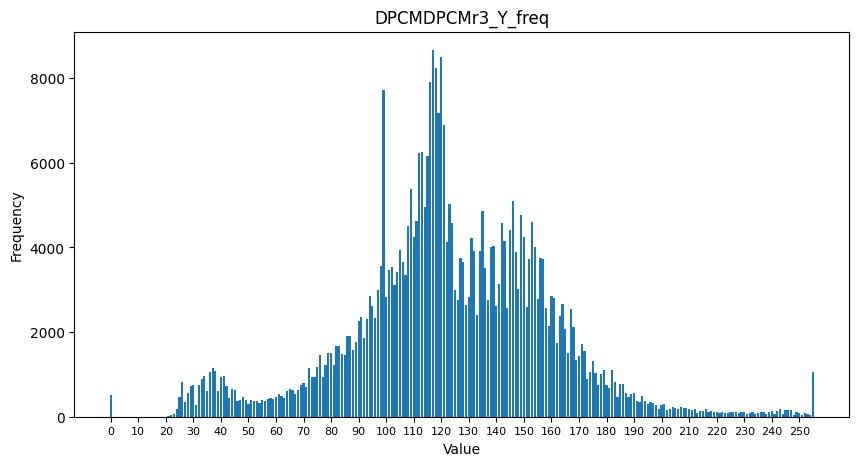

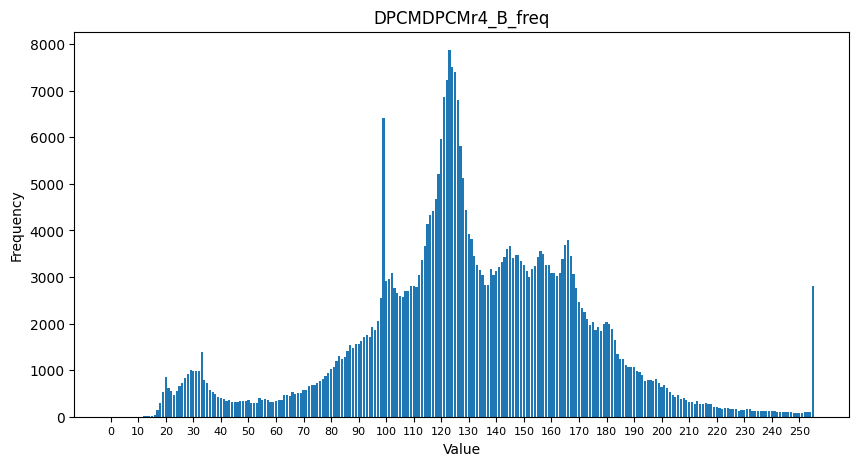

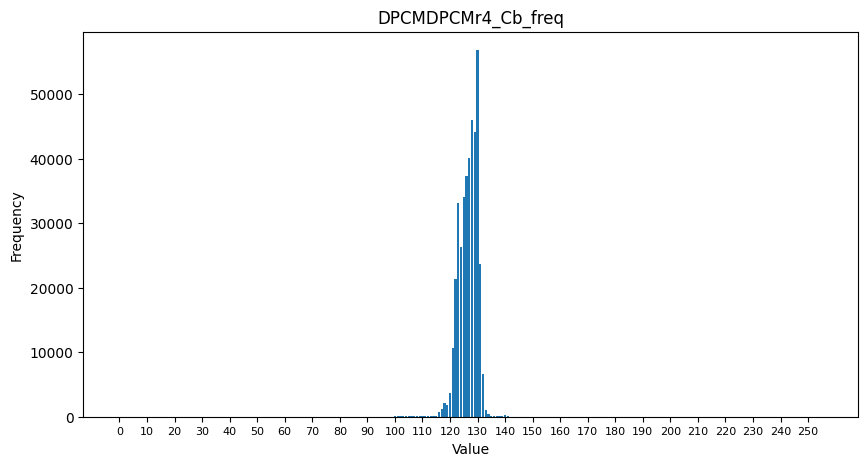

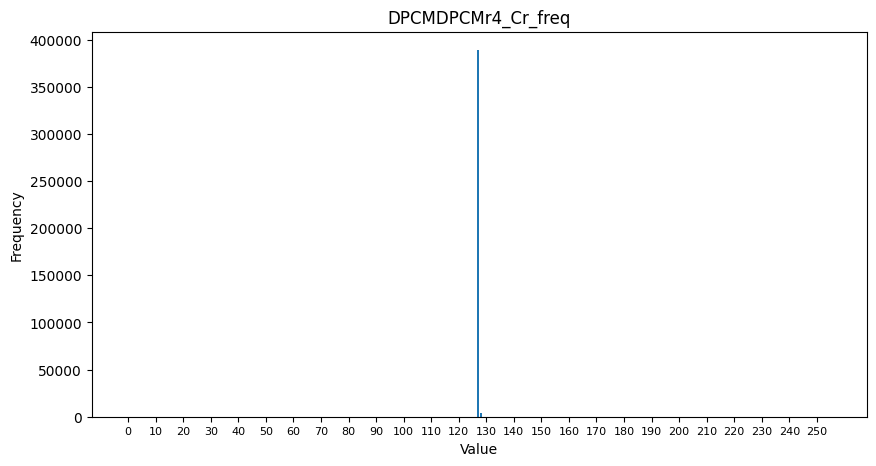

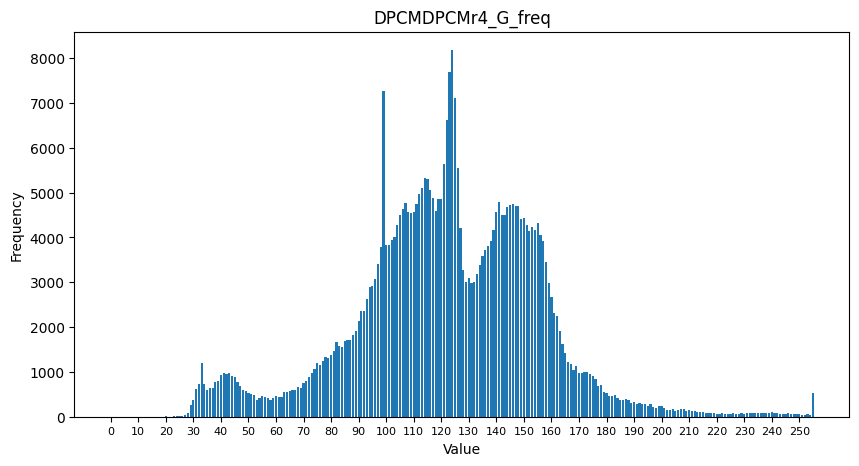

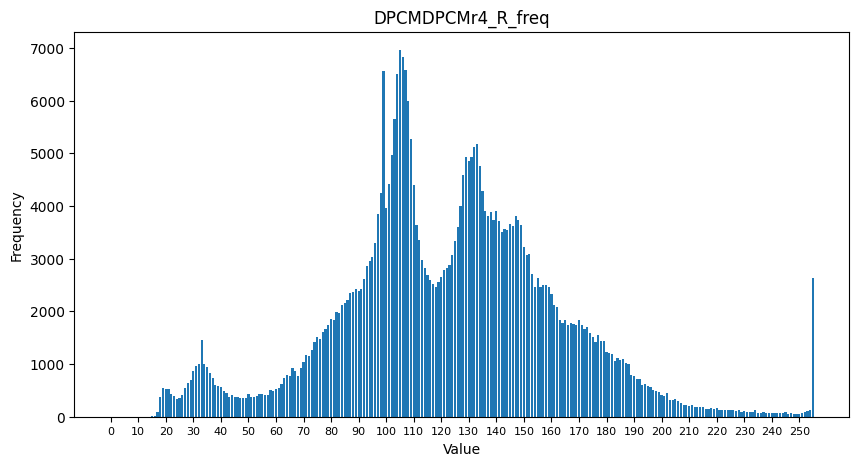

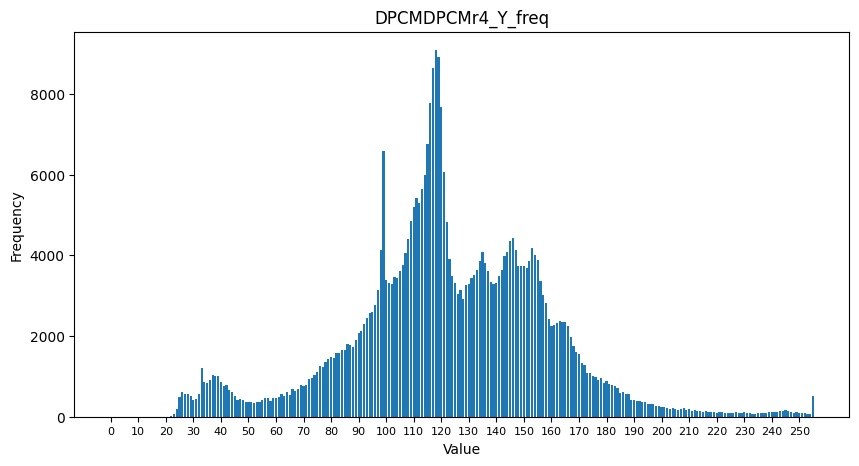

In [14]:
import os
import matplotlib.pyplot as plt

# PARAMS
DIR_PARSE = './'  # Путь к директории с файлами .hist

def parse_hist_file(file_path):
    histogram = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = map(int, line.strip().split('='))
            histogram[key] = value
    return histogram

def plot_histogram(hist_data, title):
    keys = list(hist_data.keys())
    values = list(hist_data.values())
    plt.figure(figsize=(10, 5))  # Установим больший размер графика (10x5 дюймов)
    plt.bar(keys, values)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # Установим метки на оси X для каждого десятого значения
    plt.xticks(keys[::10], keys[::10], fontsize=8)  
    
    plt.show()

for file_name in os.listdir(DIR_PARSE):
    if file_name.endswith('.hist'):
        input_file = os.path.join(DIR_PARSE, file_name)
        title = os.path.splitext(file_name)[0].split('.')[2]  # Получаем последнюю часть имени файла в качестве заголовка
        hist_data = parse_hist_file(input_file)
        plot_histogram(hist_data, title)


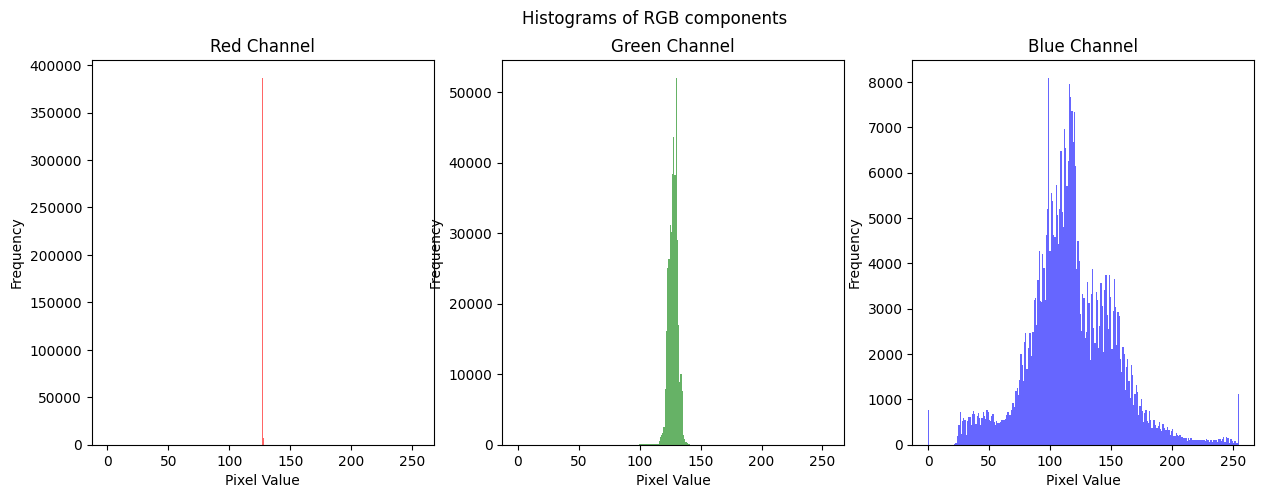

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def read_bmp(filename):
    with open(filename, 'rb') as f:
        # Считываем заголовок файла
        header = f.read(54)
        # Получаем ширину и высоту изображения из заголовка
        width = int.from_bytes(header[18:22], byteorder='little')
        height = int.from_bytes(header[22:26], byteorder='little')
        # Читаем данные о пикселях изображения
        data = np.frombuffer(f.read(), dtype=np.uint8)
        # Приводим данные к форме (ширина, высота, количество каналов)
        data = data.reshape((height, width, 3))
        return data

def plot_histogram(image, title):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(image[:,:,0].ravel(), bins=256, range=(0, 255), color='red', alpha=0.6)
    plt.title('Red Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(image[:,:,1].ravel(), bins=256, range=(0, 255), color='green', alpha=0.6)
    plt.title('Green Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(image[:,:,2].ravel(), bins=256, range=(0, 255), color='blue', alpha=0.6)
    plt.title('Blue Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.suptitle(title)
    plt.show()

filename = 'kodim10.ycbcr.bmp'
image_data = read_bmp(filename)
plot_histogram(image_data, 'Histograms of RGB components')
